In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 
import cartopy.feature as cf
from cartopy.io.shapereader import Reader
import numpy as np
from scipy.interpolate import griddata

filename = 'S202203151409471406300.txt'
df = pd.read_csv(filename,sep='\s+',
				usecols=['Station_Id_C','Day','Hour','PRS','TEM','WIN_S_Avg_2mi','PRE_1h'])
print(df)

      Station_Id_C  Day  Hour     PRS  WIN_S_Avg_2mi   TEM  PRE_1h
0            58012   12     0  1006.6            6.0   9.4     0.0
1            58012   12     1  1006.6            4.2  11.0     0.0
2            58012   12     2  1006.8            3.7  12.7     0.0
3            58012   12     3  1006.9            1.0  14.8     0.0
4            58012   12     4  1005.9            0.3  16.6     0.0
...            ...  ...   ...     ...            ...   ...     ...
5092         58377   14    20  1015.0            1.4   8.5     0.0
5093         58377   14    21  1014.8            1.9   8.6     0.0
5094         58377   14    22  1015.8            1.1   8.4     0.0
5095         58377   14    23  1016.0            1.0   9.1     0.0
5096         58377   15     0  1016.2            3.4  11.1     0.0

[5097 rows x 7 columns]


In [59]:
location = 'location.txt'
dlo = pd.read_csv(location,sep='\s+',
				usecols=[1,2,3,4])
dlo['lat']=dlo['lat']/100
dlo['lon']=dlo['lon']/100
print(dlo)

    Station_Id_C name    lat     lon
0          58012   丰县  34.41  116.35
1          58013   沛县  34.45  116.54
2          58026   邳州  34.24  118.01
3          58027   徐州  34.17  117.09
4          58035   新沂  34.20  118.21
..           ...  ...    ...     ...
64         58356   昆山  31.24  121.00
65         58358   东山  31.04  120.26
66         58359   吴江  31.08  120.37
67         58360   海门  31.55  121.12
68         58377   太仓  31.31  121.06

[69 rows x 4 columns]


In [60]:
dff = pd.merge(df,dlo)
print(dff)

      Station_Id_C  Day  Hour     PRS  WIN_S_Avg_2mi   TEM  PRE_1h name  \
0            58012   12     0  1006.6            6.0   9.4     0.0   丰县   
1            58012   12     1  1006.6            4.2  11.0     0.0   丰县   
2            58012   12     2  1006.8            3.7  12.7     0.0   丰县   
3            58012   12     3  1006.9            1.0  14.8     0.0   丰县   
4            58012   12     4  1005.9            0.3  16.6     0.0   丰县   
...            ...  ...   ...     ...            ...   ...     ...  ...   
5092         58377   14    20  1015.0            1.4   8.5     0.0   太仓   
5093         58377   14    21  1014.8            1.9   8.6     0.0   太仓   
5094         58377   14    22  1015.8            1.1   8.4     0.0   太仓   
5095         58377   14    23  1016.0            1.0   9.1     0.0   太仓   
5096         58377   15     0  1016.2            3.4  11.1     0.0   太仓   

        lat     lon  
0     34.41  116.35  
1     34.41  116.35  
2     34.41  116.35  
3     34.41

In [61]:
dff=dff.drop(dff[dff['Hour']!=0].index)
zhengdian = dff.groupby('Day')
m13 = zhengdian.get_group(13)
m14 = zhengdian.get_group(14)
m15 = zhengdian.get_group(15)
print(m13)

      Station_Id_C  Day  Hour     PRS  WIN_S_Avg_2mi   TEM  PRE_1h name  \
24           58012   13     0  1006.9            0.5   9.5     0.0   丰县   
98           58013   13     0  1007.5            0.3  10.4     0.0   沛县   
172          58026   13     0  1008.3            3.0  13.5     0.0   邳州   
246          58027   13     0  1006.7            0.0  12.5     0.0   徐州   
320          58035   13     0  1008.3            3.0  11.7     0.0   新沂   
...            ...  ...   ...     ...            ...   ...     ...  ...   
4751         58356   13     0  1010.7            2.1  20.6     0.0   昆山   
4825         58358   13     0  1008.6            2.5  21.1     0.0   东山   
4899         58359   13     0  1010.0            1.3  21.1     0.0   吴江   
4973         58360   13     0  1010.3            1.2  17.3     1.9   海门   
5047         58377   13     0  1010.5            0.9  19.7     0.0   太仓   

        lat     lon  
24    34.41  116.35  
98    34.45  116.54  
172   34.24  118.01  
246   34.17

In [62]:
def plot_shp_border(ax,shp_filename,ls=None,lw=None,color=None,alpha=None):
    import shapefile
    import cartopy.crs as ccrs
    """
    Parameters
    ----------
    ax           : where to plot
    shp_filename : shp file , without".shp"
    ls,linestyle : The default is None.
    lw,linewidth : The default is None.
    color        : The default is None.
    alpha        : The default is None.
    ------
    """
    shp_file=shpdata+shp_filename
    border_file=shapefile.Reader(shp_file)
    border=border_file.shapes()
    for index in range(len(border)):
        border_points = border[index].points
        x,y = zip(*border_points)
        ax.plot(x[20:433],y[20:433],linestyle=ls,linewidth=lw,color=color,
                alpha=alpha, transform=ccrs.PlateCarree(),zorder=1)
    return


In [63]:
shpdata='E:/China_province_shpdata/'
jsshp = cf.ShapelyFeature(Reader(shpdata+'jiangsu.shp').geometries(), ccrs.PlateCarree())
def set_geo(ax):
    # proj=ccrs.LambertConformal()
    extent=[116.21,121.56,30.45, 35.08]
    ax.set_extent(extent, crs=ccrs.PlateCarree()) 
    ax.add_feature(cf.OCEAN, facecolor='#97DBF2')
    ax.add_feature(cf.LAND)
    ax.add_feature(jsshp, linestyle=(0,(5,0)), linewidth=0.1, edgecolor='k', facecolor='None',alpha=0.99,zorder=4)
    #------------------------------------------------------------------------------------------------------------------------------------
    lb=ax.gridlines(draw_labels=None, xlocs=range(116,122,1), ylocs=range(30,35,1), linestyle=(0,(10,10)), linewidth=0.25, color='dimgrey', alpha=0.8, zorder=4)
    lb=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False,xlocs=range(116,122,1), ylocs=range(30,35,1),linewidth=0.1, color='gray', alpha=0.8, linestyle='--' )
    lb.top_labels = None
    lb.right_labels = None
    lb.rotate_labels = False
    #----------------------------------------------------------
    

In [7]:
def interf(m13_lon,m13_lat,m13_prs):
    lon = m13_lon+0.2
    lat = m13_lat+0.2

    points = []
    for i in range(len(m13)):
        point=[]
        point.append(list(lon)[i])
        point.append(list(lat)[i])   
        points.append(point)
    points = np.array(points)

    p = m13_prs.values

    olon = np.linspace(116.2,121.5,100)
    olat = np.linspace(30.4, 35.0,100)
    X,Y= np.meshgrid(olon,olat)

    prs = griddata(points,p,(X,Y),method='linear')
    return prs


In [8]:
def plot_1():
    olon = np.linspace(116.2,121.5,100)
    olat = np.linspace(30.4, 35.0,100)
    X,Y= np.meshgrid(olon,olat)
    proj=ccrs.PlateCarree()
    fig = plt.figure(figsize=(8,6))
    #prs
    ax = plt.subplot(411,projection=proj)
    ax.set_title('3/13 00:00',fontsize=15)
    set_geo(ax)
    ax.set_title('a)', loc='left', y=0.02, x=0.02,
             fontsize='medium')
    ax.contourf(X,Y,interf(m13['lon'],m13['lat'],m13['PRS']),                                                          
                    cmap='RdBu_r',transform=proj)
    
    #temp
    ax2 = plt.subplot(412,projection=proj)
    set_geo(ax2)
    ax2.set_title('b)', loc='left', y=0.02, x=0.02,
             fontsize='medium')
    ax2.contourf(X,Y,interf(m13['lon'],m13['lat'],m13['TEM']),                                                          
                    cmap='RdBu_r',transform=proj)
    
    #wind
    ax3 = plt.subplot(413,projection=proj)
    set_geo(ax3)
    ax3.set_title('c)', loc='left', y=0.02, x=0.02,
             fontsize='medium')
    ax3.contourf(X,Y,interf(m13['lon'],m13['lat'],m13['WIN_S_Avg_2mi']),                                                          
                    cmap='RdBu_r',transform=proj)
    
    #pre
    ax4 = plt.subplot(414,projection=proj)
    set_geo(ax4)
    ax4.set_title('d)', loc='left', y=0.02, x=0.02,
             fontsize='medium')
    ax4.contourf(X,Y,interf(m13['lon'],m13['lat'],m13['PRE_1h']),                                                          
                    cmap='RdBu_r',transform=proj)
    
    plt.savefig('0313.png',dpi=800,bbox_inches='tight',pad_inches=0)
    return

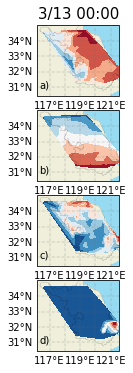

In [9]:
plot_1()

In [11]:
def plot_2():
    olon = np.linspace(116.2,121.5,100)
    olat = np.linspace(30.4, 35.0,100)
    X,Y= np.meshgrid(olon,olat)
    proj=ccrs.PlateCarree()
    fig = plt.figure(figsize=(8,6))
    #prs
    ax = plt.subplot(411,projection=proj)
    ax.set_title('3/14 00:00',fontsize=15)
    set_geo(ax)
    ax.set_title('a)', loc='left', y=0.02, x=0.02,
             fontsize='medium')
    ax.contourf(X,Y,interf(m14['lon'],m14['lat'],m14['PRS']),                                                          
                    cmap='RdBu_r',transform=proj)
    
    #temp
    ax2 = plt.subplot(412,projection=proj)
    set_geo(ax2)
    ax2.set_title('b)', loc='left', y=0.02, x=0.02,
             fontsize='medium')
    ax2.contourf(X,Y,interf(m14['lon'],m14['lat'],m14['TEM']),                                                          
                    cmap='RdBu_r',transform=proj)
    
    #wind
    ax3 = plt.subplot(413,projection=proj)
    set_geo(ax3)
    ax3.set_title('c)', loc='left', y=0.02, x=0.02,
             fontsize='medium')
    ax3.contourf(X,Y,interf(m14['lon'],m14['lat'],m14['WIN_S_Avg_2mi']),                                                          
                    cmap='RdBu_r',transform=proj)
    
    #pre
    ax4 = plt.subplot(414,projection=proj)
    set_geo(ax4)
    ax4.set_title('d)', loc='left', y=0.02, x=0.02,
             fontsize='medium')
    ax4.contourf(X,Y,interf(m14['lon'],m14['lat'],m14['PRE_1h']),                                                          
                    cmap='RdBu_r',transform=proj)
    
    plt.savefig('0314.png',dpi=800,bbox_inches='tight',pad_inches=0)
    return

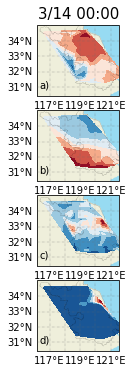

In [12]:
plot_2()

In [29]:
def plot_3():
    olon = np.linspace(116.2,121.5,100)
    olat = np.linspace(30.4, 35.0,100)
    X,Y= np.meshgrid(olon,olat)
    proj=ccrs.PlateCarree()
    fig = plt.figure(figsize=(8,6))
    #prs
    ax = plt.subplot(411,projection=proj)
    ax.set_title('3/15 00:00',fontsize=15)
    set_geo(ax)
    ax.set_title('a)', loc='left', y=0.02, x=0.02,
             fontsize='medium')
    ac = ax.contourf(X,Y,interf(m15['lon'],m15['lat'],m15['PRS']),                                                          
                    cmap='RdBu_r',transform=proj)
    fig.colorbar(ac)
    
    #temp
    ax2 = plt.subplot(412,projection=proj)
    set_geo(ax2)
    ax2.set_title('b)', loc='left', y=0.02, x=0.02,
             fontsize='medium')
    ac2=ax2.contourf(X,Y,interf(m15['lon'],m15['lat'],m15['TEM']),                                                          
                    cmap='RdBu_r',transform=proj)
    fig.colorbar(ac2)
    
    #wind
    ax3 = plt.subplot(413,projection=proj)
    set_geo(ax3)
    ax3.set_title('c)', loc='left', y=0.02, x=0.02,
             fontsize='medium')
    ac3=ax3.contourf(X,Y,interf(m15['lon'],m15['lat'],m15['WIN_S_Avg_2mi']),                                                          
                    cmap='RdBu_r',transform=proj)
    fig.colorbar(ac3)
    
    #pre
    ax4 = plt.subplot(414,projection=proj)
    set_geo(ax4)
    ax4.set_title('d)', loc='left', y=0.02, x=0.02,
             fontsize='medium')
    ac4=ax4.contourf(X,Y,interf(m15['lon'],m15['lat'],m15['PRE_1h']),                                                          
                    cmap='RdBu_r',transform=proj)
    fig.colorbar(ac4)
    
    plt.savefig('0315.png',dpi=800,bbox_inches='tight',pad_inches=0)
    return

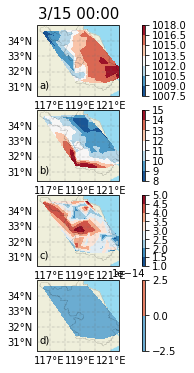

In [30]:
plot_3()

In [124]:
def plot_sta():
    import warnings;  warnings.filterwarnings('ignore')
    plt.rcParams['font.sans-serif'] = ['Times New Roman']
    olon = np.linspace(116.2,121.5,100)
    olat = np.linspace(30.4, 35.0,100)
    X,Y= np.meshgrid(olon,olat)
    proj=ccrs.PlateCarree()
    fig = plt.figure(figsize=(24,18))
    ax = plt.subplot(411,projection=proj)
    set_geo(ax)
    ax.scatter(m15['lon']+0.2,m15['lat']+.2,
               s=3,
               c='r',
)
#     for i in m15.iloc():
#         ax.text(i['lon']-0.1,i['lat']+0.21,
#                i['Station_Id_C'])
    
    plt.savefig('stations.png',dpi=800,bbox_inches='tight',pad_inches=0)
    return


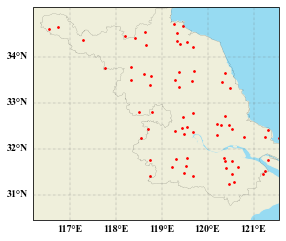

In [125]:
plot_sta()